# Linear Classifiers
This file is for trying all the linear classifiers provided in the scikit-learn package. 

## SVM
Support vector machines are the traditional linear classifier. The key concept in here is to understand how the optimization is implemented, and how kernel functions are introduced.
We can also refer to our advance numerical optimization course lecture notes for the details. Intuitively, SVM classifiers aims at maximizing the margin between the separation hyperplane and the data points. The mathematical formulation then becomes:
$$ min \frac{1}{2} w^Tw + C\sum \xi \\
s.t. y_i(w^T \phi(x)+b) \geq 1 -\xi_i \\
\xi \geq 0
$$
For general linear classifiers, the function $\phi(x)$ can be assumed to be the orginal data points, or some feature vectors representing the data points. In general, we choose $\phi$ according to some prior knowledge, or use corss-validation. 
Another meaning in choosing $\phi$ is that, in the actual implementation of SVM, we usually work with the dual instead of the primal problem. The dual of a SVM is
$$  min \frac{1}{2} \alpha^T Q\alpha -e^T \alpha \\
s.t. y^T \alpha = 0 \\
0\leq \alpha \leq C$$
In the dual problem, the matrix $Q_{ij}=y_jy_j\phi(x_i)^T\phi(x_j)$. Thus, we only need the inner product of the functions $\phi$. Further, we can even not explicitly define the function $\phi$ and work directly with the inner products, thus the kernel.

## Non-linear SVM with BFC kernel
This example comes from the official scikit learn package

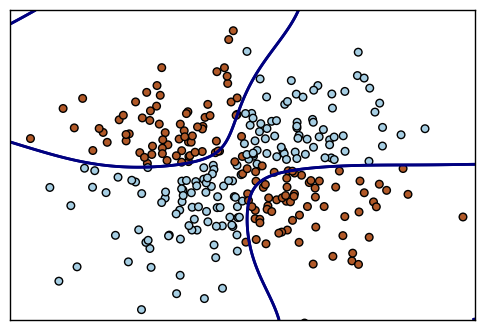

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
xx, yy = np.meshgrid(np.linspace(-3,3,500),np.linspace(-3,3,500))
np.random.seed(2016)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0]>0,X[:,1]>0)

clf = svm.NuSVC()
clf.fit(X,Y)

z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contours = plt.contour(xx,yy,z,levels=[0],linewidths=2,linetypes='--')
plt.scatter(X[:,0],X[:,1],s=30,c=Y,cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-3,3,-3,3])
plt.show()

## LDA and QDA
Both these methods originates from a bayes interporetation of our data. It is easily computable, no hyperparameter to be tuned. The general formulation is as follows:
$$ P(y=k|X) = \frac{P(X|y=k)P(y=k)}{P(X)} = \frac{P(X|y=k)P(y=k)}{\sum P(X|y=l)P(y=l)} $$
In classification, we choose the $k$ that will maximize this conditional probability.
For linear and quadratic discriminant analysis, $P(X|y)$ is modelled as multivariate Gaussian distribution. Given by
$$ p(X|y=k) = \frac{1}{(2\pi)^{n}|\Sigma_k|^{1/2}} exp( -\frac{1}{2}(X-\mu_k)\Sigma_k^{-1}(X-\mu_k) ) $$
If we assume the covariance structure $\Sigma_k$ is the same across all classes, then this will give the linear discriminant analysis. If we drop such assumption, it will give the quadractic discriminant analysis. 
Remark: it looks that this concept is identical to gaussian mixture models. 